In [133]:
# remember this cell as this cell has mixed up of KERAS and TENSORFLOW...
import numpy as np
import keras as k
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
train_path = 'G:/AI_INTRO/DEEPLIZARD/dogs-vs-cats/train'
valid_path = 'G:/AI_INTRO/DEEPLIZARD/dogs-vs-cats/valid'
test_path = 'G:/AI_INTRO/DEEPLIZARD/dogs-vs-cats/test'

In [135]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [136]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


C:\Users\h\anaconda3\envs\tf-new\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


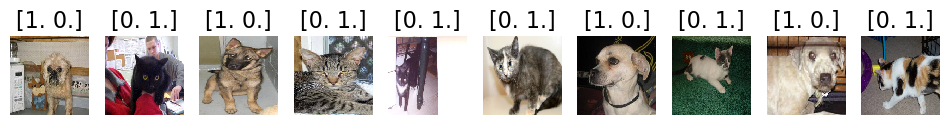

In [137]:
imgs, labels = next(train_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

## Build and train CNN

In [138]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [139]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
model.fit_generator(train_batches, steps_per_epoch=40,
                   validation_data=valid_batches, validation_steps=10, epochs=10, verbose=2)

# Here, steps_per_epoch = train size(no of training img)/ train batch size (given in ImageDataGenerator parameter) = 1000/10 = 100
# and validation_steps = validation img number / validation batch size (given in ImageDataGenerator parameter) =  200/10 = 20

C:\Users\h\anaconda3\envs\tf-new\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
40/40 - 1s - loss: 570.5486 - accuracy: 0.4925 - val_loss: 304.3456 - val_accuracy: 0.4800
Epoch 2/10
40/40 - 1s - loss: 249.7506 - accuracy: 0.5150 - val_loss: 456.9425 - val_accuracy: 0.5000
Epoch 3/10
40/40 - 1s - loss: 241.4610 - accuracy: 0.6175 - val_loss: 239.3619 - val_accuracy: 0.5800
Epoch 4/10
40/40 - 1s - loss: 100.6011 - accuracy: 0.6700 - val_loss: 71.0272 - val_accuracy: 0.5900
Epoch 5/10
40/40 - 1s - loss: 70.7744 - accuracy: 0.6925 - val_loss: 137.0148 - val_accuracy: 0.5500
Epoch 6/10
40/40 - 1s - loss: 70.3293 - accuracy: 0.7100 - val_loss: 109.6872 - val_accuracy: 0.6000
Epoch 7/10
40/40 - 1s - loss: 63.9229 - accuracy: 0.7350 - val_loss: 95.1966 - val_accuracy: 0.5900
Epoch 8/10
40/40 - 1s - loss: 92.7981 - accuracy: 0.6975 - val_loss: 145.0573 - val_accuracy: 0.5100
Epoch 9/10
40/40 - 1s - loss: 45.7639 - accuracy: 0.7850 - val_loss: 66.5415 - val_accuracy: 0.5700
Epoch 10/10
40/40 - 1s - loss: 19.2583 - accuracy: 0.8800 - val_loss: 104.1068 - val_accur

## Prediction

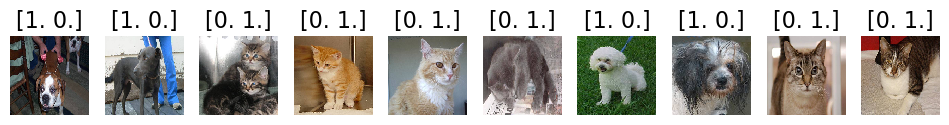

In [141]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [142]:
test_labels = test_labels[:,0]
t = test_labels.view('int32')

In [143]:
test_labels

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 0.], dtype=float32)

In [144]:
predictions = model.predict_generator(test_batches, steps = 1, verbose = 0)
# steps = test img number / test batch size = 100 / 10 = 10

C:\Users\h\anaconda3\envs\tf-new\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [145]:
predictions 

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [3.7681478e-23, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [146]:
p64= predictions.astype('int64')
p_round = predictions.round()

In [147]:
cm_p64 = confusion_matrix(test_labels, p64[:,0])
cm_round = confusion_matrix(test_labels, p_round[:,0])

In [148]:
cm_p64

array([[6, 0],
       [3, 1]], dtype=int64)

In [149]:
cm_round

array([[6, 0],
       [3, 1]], dtype=int64)

In [150]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[6 0]
 [3 1]]


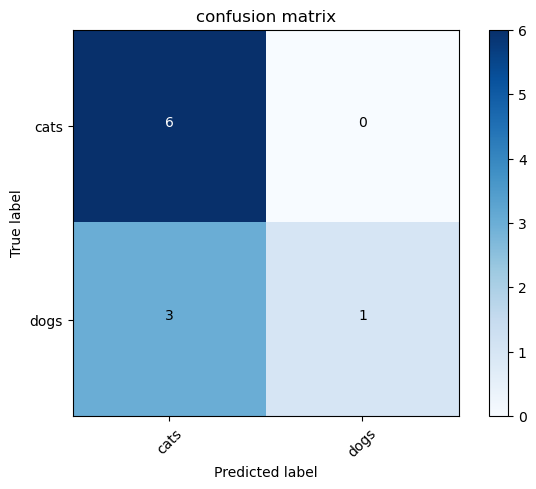

In [151]:
cm_plot_labels = ["cats", "dogs"]
plot_confusion_matrix(cm_round, cm_plot_labels, title="confusion matrix")